In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data prep

In [10]:
#import data
bcd = pd.read_csv("C:/Users/jjden/Dropbox/Education/IU/python course/final project/Breast-Cancer-Wisconsin.csv",skip_blank_lines=True,header=0)

#replace missing data('?')
bcd.A7.replace('?',np.NaN)
bcd.A7 = pd.to_numeric(bcd.A7,errors='coerce')
print("Count of isnull (NaN) in column A7: " + str(bcd.A7.isnull().sum()))

#continue data cleanup
bcd.fillna(bcd.loc[:,"A7"].mean(skipna=True), inplace=True)

Count of isnull (NaN) in column A7: 16


1. Use KMeans algorithm (do not use column CLASS) 10pts

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
dfa2a9 = bcd[['A2','A3','A4','A5','A6','A7','A8','A9','A10']]
#print(type(dfa2a9))
#print(dfa2a9)
model.fit(dfa2a9.values)
print("Here are centroids:")
print(model.cluster_centers_)

Here are centroids:
[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]]


2. Find the optimal number of clusters 10 pts

Text(0, 0.5, 'inertia')

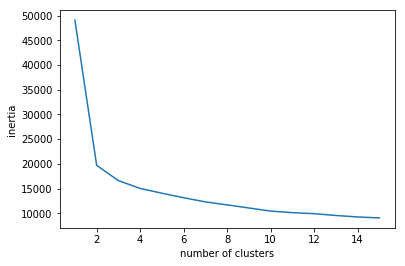

In [12]:
inertiaRange = range(1,16)
inertiaList = []
for x in inertiaRange:
    model = KMeans(n_clusters=x)
    model.fit(dfa2a9.values)
    inertiaList.append(model.inertia_)
#plot range and inertia
ax = plt.plot(inertiaRange,inertiaList)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

3 seems like optimal number of clusters

3. Revise data variation 10pts

A10    1.715078
A6     2.214300
A8     2.438364
A2     2.815741
A5     2.855379
A4     2.971913
A3     3.051459
A9     3.053634
A7     3.601852
dtype: float64


Text(0, 0.5, 'standard deviation')

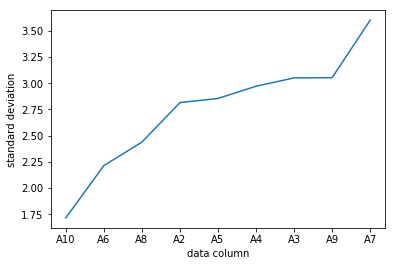

In [13]:
#dataframe.std() will run only on numeric columns, i.e. not the labels
stdev = dfa2a9.std()
stdev.sort_values(ascending=True,inplace=True)
print(stdev)
ax2 = plt.plot(stdev.index,stdev.values)
plt.xlabel('data column')
plt.ylabel('standard deviation')

4. Implement normalization 8pts

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(dfa2a9.values)
print("Here are centroids:")
print(kmeans.cluster_centers_)

Here are centroids:
[[-0.51945334 -0.61728918 -0.61702732 -0.52103625 -0.53370405 -0.60430508
  -0.56576652 -0.54283279 -0.29912703]
 [ 0.94324425  1.06056115  1.0579358   0.87929444  0.86029786  1.12907601
   1.00835139  0.92952452  0.03297812]
 [ 1.16860808  1.75960552  1.77223164  1.58294095  1.86961155  1.16430087
   1.3895322   1.56650375  3.80910288]]
